In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [46]:
#!pip install pickle5
#import pickle5 as pickle

with open('df.pkl', "rb") as fh:
    data = pickle.load(fh)

In [47]:
data.head()

,ebitdaMargins,fullTimeEmployees,marketCap,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,grossProfits,...,earningsGrowth,returnOnAssets,debtToEquity,returnOnEquity,totalCashPerShare,revenuePerShare,trailingEps,priceToBook,beta,priceToSalesTrailing12Months
RIVN,0.00000,6274,9.785422e+10,0.00000,0.00000,-1.347000e+09,NaN,0.00000,-1.581000e+09,NaN,...,NaN,NaN,3.443,NaN,36.049,NaN,-16.118,NaN,NaN,NaN
INMD,0.46321,311,5.499482e+09,0.46057,0.85314,1.635790e+08,0.577,0.46170,1.492520e+08,1.752580e+08,...,0.825,0.25763,0.923,0.48197,4.684,4.056,1.736,15.507215,1.649566,17.067900
NVAX,-0.85647,792,1.224624e+10,-0.89307,-0.63884,5.367860e+08,0.139,-0.86543,-1.030975e+09,-2.714290e+08,...,NaN,-0.37100,99.453,-2.80103,25.619,16.736,-14.946,25.049490,1.273246,10.173419
ZG,0.00970,7999,1.381997e+10,-0.04364,0.36452,-3.287282e+09,1.645,-0.00697,4.904800e+07,1.583422e+09,...,NaN,-0.00249,80.479,-0.04378,12.619,20.605,-0.899,2.373847,1.326233,2.734453
ATVI,0.37638,9500,4.462255e+10,0.29209,0.72647,2.893000e+09,0.059,0.36169,3.407000e+09,5.826000e+09,...,0.051,0.08984,21.280,0.16877,12.839,11.672,3.371,2.632208,0.594285,4.929579


In [48]:
data.shape

(143, 21)

In [49]:
data.isnull().sum()

ebitdaMargins                    0
fullTimeEmployees                0
marketCap                        3
profitMargins                    0
grossMargins                     0
operatingCashflow               11
revenueGrowth                    2
operatingMargins                 0
ebitda                          15
grossProfits                     1
freeCashflow                    29
earningsGrowth                  63
returnOnAssets                   8
debtToEquity                    18
returnOnEquity                  17
totalCashPerShare                0
revenuePerShare                  1
trailingEps                     17
priceToBook                     26
beta                            20
priceToSalesTrailing12Months     4
dtype: int64

In [50]:
data.dtypes

ebitdaMargins                   float64
fullTimeEmployees                 int64
marketCap                       float64
profitMargins                   float64
grossMargins                    float64
operatingCashflow               float64
revenueGrowth                   float64
operatingMargins                float64
ebitda                          float64
grossProfits                    float64
freeCashflow                    float64
earningsGrowth                  float64
returnOnAssets                  float64
debtToEquity                    float64
returnOnEquity                  float64
totalCashPerShare               float64
revenuePerShare                 float64
trailingEps                     float64
priceToBook                     float64
beta                            float64
priceToSalesTrailing12Months    float64
dtype: object

In [51]:
data.reset_index(inplace=True)
data.rename(columns = {'index': 'name'}, inplace=True)
data.head()

,name,ebitdaMargins,fullTimeEmployees,marketCap,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,...,earningsGrowth,returnOnAssets,debtToEquity,returnOnEquity,totalCashPerShare,revenuePerShare,trailingEps,priceToBook,beta,priceToSalesTrailing12Months
0,RIVN,0.00000,6274,9.785422e+10,0.00000,0.00000,-1.347000e+09,NaN,0.00000,-1.581000e+09,...,NaN,NaN,3.443,NaN,36.049,NaN,-16.118,NaN,NaN,NaN
1,INMD,0.46321,311,5.499482e+09,0.46057,0.85314,1.635790e+08,0.577,0.46170,1.492520e+08,...,0.825,0.25763,0.923,0.48197,4.684,4.056,1.736,15.507215,1.649566,17.067900
2,NVAX,-0.85647,792,1.224624e+10,-0.89307,-0.63884,5.367860e+08,0.139,-0.86543,-1.030975e+09,...,NaN,-0.37100,99.453,-2.80103,25.619,16.736,-14.946,25.049490,1.273246,10.173419
3,ZG,0.00970,7999,1.381997e+10,-0.04364,0.36452,-3.287282e+09,1.645,-0.00697,4.904800e+07,...,NaN,-0.00249,80.479,-0.04378,12.619,20.605,-0.899,2.373847,1.326233,2.734453
4,ATVI,0.37638,9500,4.462255e+10,0.29209,0.72647,2.893000e+09,0.059,0.36169,3.407000e+09,...,0.051,0.08984,21.280,0.16877,12.839,11.672,3.371,2.632208,0.594285,4.929579


### After droping "earningsGrowth" (63 nulls), only 4 rows with more than 1/3 null values

In [55]:
#data.drop(['earningsGrowth'], axis=1, inplace=True)
drop_rows = []
for index, row in data.iterrows():
    if data.iloc[index,:].isnull().sum() > data.shape[1]/3:
        drop_rows.append(index)
drop_rows

[0, 49, 53, 69]

In [77]:
com = []
noncom = []
for col in data.iloc[:,1:].columns:
    if data[col].isnull().sum() == 0:
        com.append(col)
    else:
        noncom.append(col)

print(f'{len(com)} complete columns:\n{com}')
print(f'\n{len(noncom)} noncomplete columns:\n{noncom}')

6 complete columns:
['ebitdaMargins', 'fullTimeEmployees', 'profitMargins', 'grossMargins', 'operatingMargins', 'totalCashPerShare']

14 noncomplete columns:
['marketCap', 'operatingCashflow', 'revenueGrowth', 'ebitda', 'grossProfits', 'freeCashflow', 'returnOnAssets', 'debtToEquity', 'returnOnEquity', 'revenuePerShare', 'trailingEps', 'priceToBook', 'beta', 'priceToSalesTrailing12Months']


### complete columns

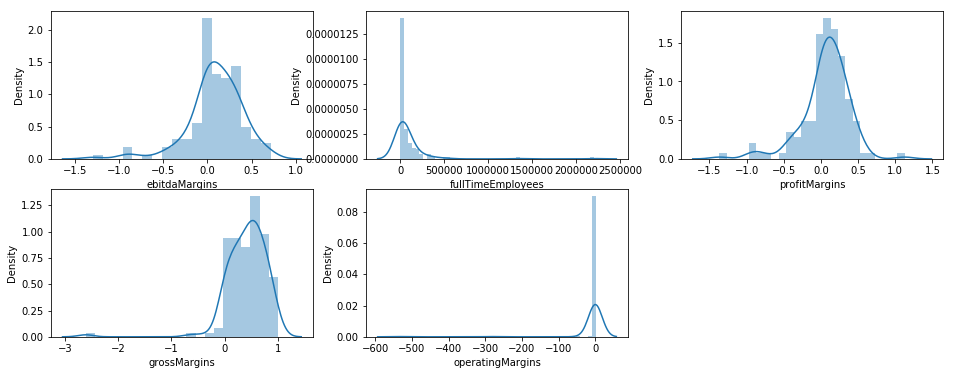

In [90]:
plt.figure(figsize=(16,6))
for i in range(len(com)-1):
    plt.subplot(2, 3, i+1)
    try:
        sns.distplot(data[com[i]])    
    except:
        pass

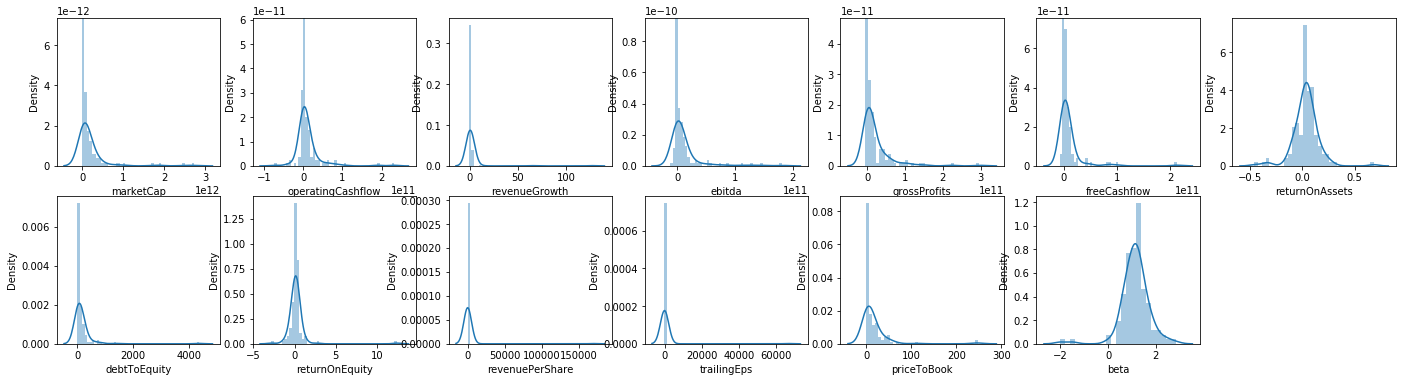

In [94]:
plt.figure(figsize=(24,6))
for i in range(len(noncom)-1):
    plt.subplot(2, 7, i+1)
    try:
        sns.distplot(data[noncom[i]])    
    except:
        pass

In [97]:
for col in noncom:
    data[col].fillna(data[col].median(), inplace=True)

data.isnull().sum()

name                            0
ebitdaMargins                   0
fullTimeEmployees               0
marketCap                       0
profitMargins                   0
grossMargins                    0
operatingCashflow               0
revenueGrowth                   0
operatingMargins                0
ebitda                          0
grossProfits                    0
freeCashflow                    0
returnOnAssets                  0
debtToEquity                    0
returnOnEquity                  0
totalCashPerShare               0
revenuePerShare                 0
trailingEps                     0
priceToBook                     0
beta                            0
priceToSalesTrailing12Months    0
dtype: int64

In [101]:
data.head()

,name,ebitdaMargins,fullTimeEmployees,marketCap,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,...,freeCashflow,returnOnAssets,debtToEquity,returnOnEquity,totalCashPerShare,revenuePerShare,trailingEps,priceToBook,beta,priceToSalesTrailing12Months
0,RIVN,0.00000,6274,9.785422e+10,0.00000,0.00000,-1.347000e+09,0.364,0.00000,-1.581000e+09,...,1.585687e+09,0.03450,3.443,0.144325,36.049,24.7185,-16.118,5.219568,1.168122,4.613105
1,INMD,0.46321,311,5.499482e+09,0.46057,0.85314,1.635790e+08,0.577,0.46170,1.492520e+08,...,1.043351e+08,0.25763,0.923,0.481970,4.684,4.0560,1.736,15.507215,1.649566,17.067900
2,NVAX,-0.85647,792,1.224624e+10,-0.89307,-0.63884,5.367860e+08,0.139,-0.86543,-1.030975e+09,...,8.637507e+08,-0.37100,99.453,-2.801030,25.619,16.7360,-14.946,25.049490,1.273246,10.173419
3,ZG,0.00970,7999,1.381997e+10,-0.04364,0.36452,-3.287282e+09,1.645,-0.00697,4.904800e+07,...,-3.539508e+09,-0.00249,80.479,-0.043780,12.619,20.6050,-0.899,2.373847,1.326233,2.734453
4,ATVI,0.37638,9500,4.462255e+10,0.29209,0.72647,2.893000e+09,0.059,0.36169,3.407000e+09,...,2.751750e+09,0.08984,21.280,0.168770,12.839,11.6720,3.371,2.632208,0.594285,4.929579


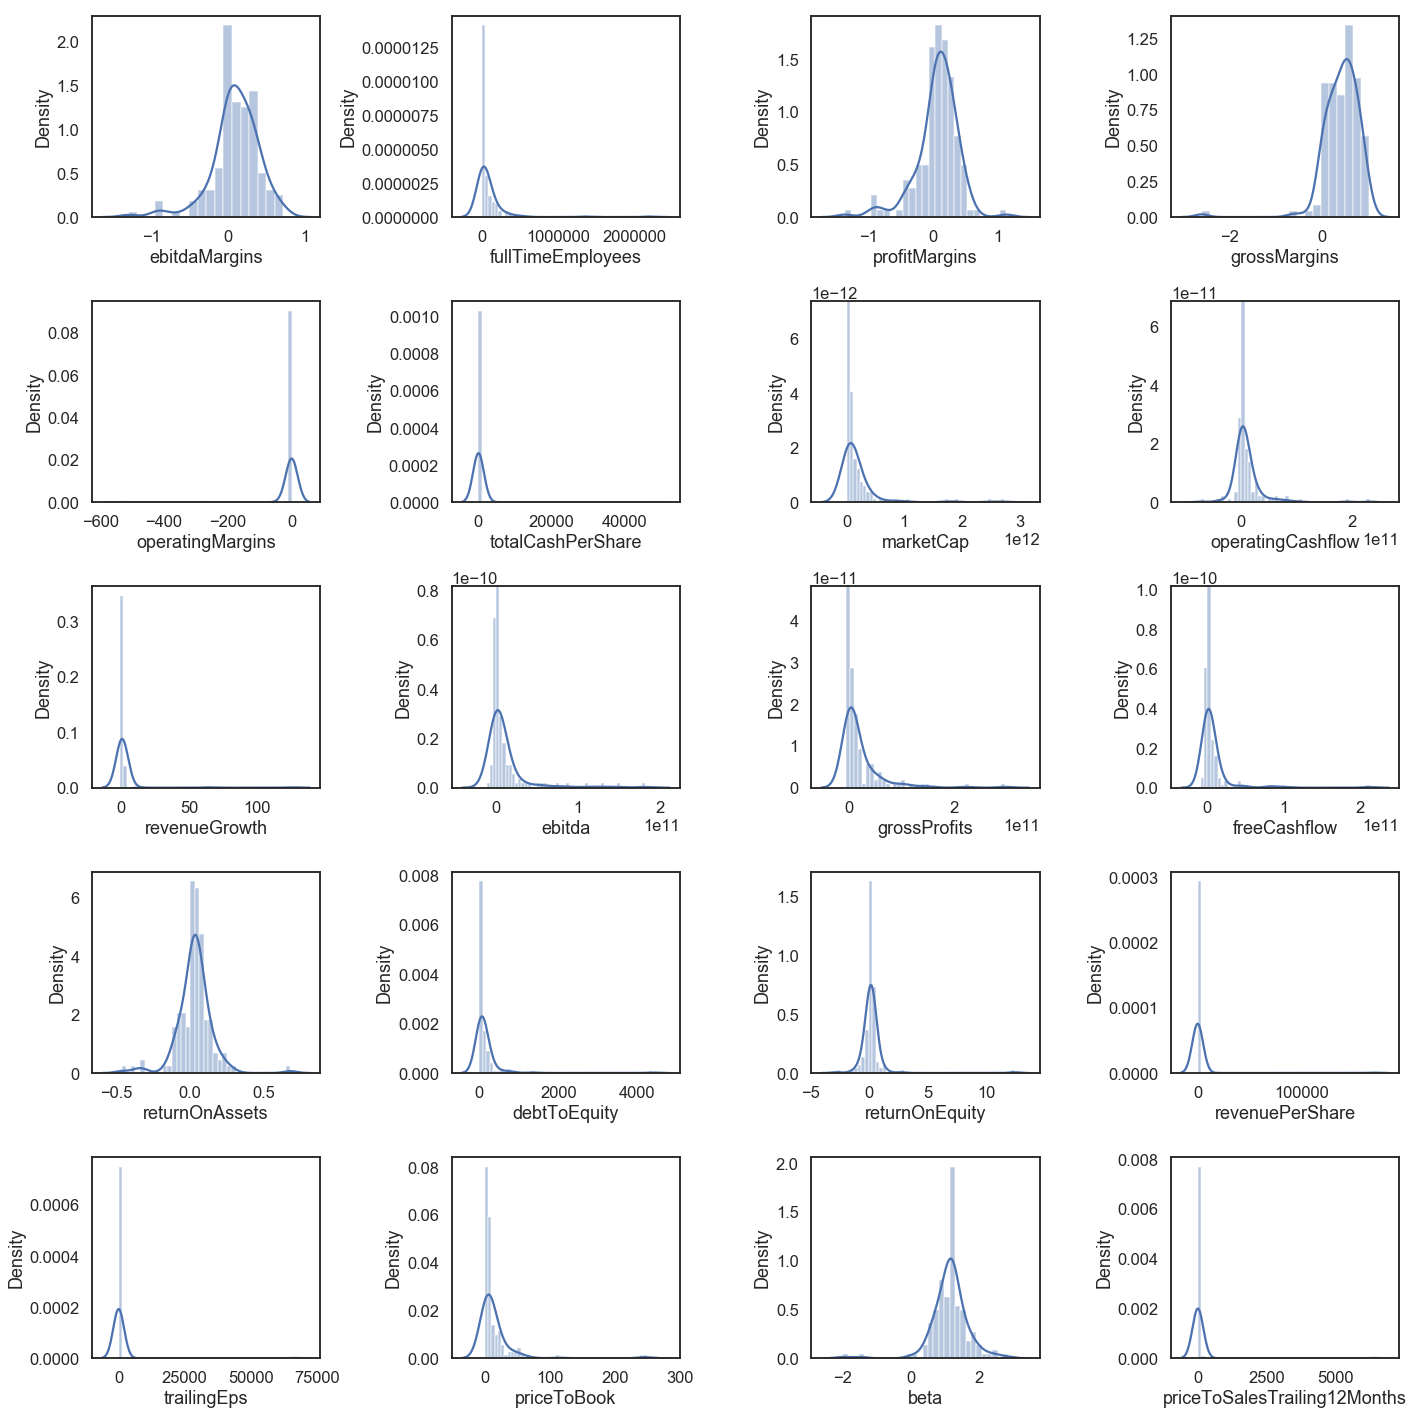

In [134]:
var = com + noncom
fig = plt.figure(figsize=(20,20))
for i in range(20):
    ax = fig.add_subplot(5, 4, i+1)
    sns.set_context('talk')
    sns.distplot(data[var[i]],ax=ax) 
fig.tight_layout()

<Figure size 576x288 with 0 Axes>

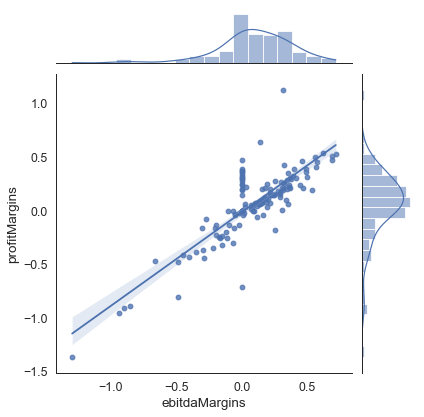

In [121]:
sns.set_style('white')
plt.figure(figsize=(8,4))

sns.set_context('paper', font_scale=1.4)
sns.jointplot(x='ebitdaMargins',y='profitMargins',
              data=data,kind='reg')
#sns.despine(left=True, bottom=True)

In [294]:
var = com + noncom

In [295]:
var.remove('ebitdaMargins')

from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_SS = SS.fit_transform(data[var])

data_SS = pd.DataFrame(X_SS, columns = var)
data_SS.head()

,fullTimeEmployees,profitMargins,grossMargins,operatingMargins,totalCashPerShare,marketCap,operatingCashflow,revenueGrowth,ebitda,grossProfits,freeCashflow,returnOnAssets,debtToEquity,returnOnEquity,revenuePerShare,trailingEps,priceToBook,beta,priceToSalesTrailing12Months
0,-0.363141,-0.200183,-1.046228,0.120709,-0.091837,-0.227042,-0.383324,-0.136657,-0.453837,-0.386893,-0.255664,0.020726,-0.352005,-0.042396,-0.086218,-0.087467,-0.288509,0.057414,-0.095932
1,-0.389244,1.233612,1.118680,0.129826,-0.099708,-0.464936,-0.334749,-0.118525,-0.389098,-0.513762,-0.321305,1.903412,-0.358369,0.253289,-0.087689,-0.084228,0.035496,0.931398,-0.072400
2,-0.387138,-2.980390,-2.667334,0.103619,-0.094454,-0.447557,-0.322748,-0.155811,-0.433257,-0.524830,-0.287654,-3.400730,-0.109539,-2.621719,-0.086786,-0.087255,0.336026,0.248250,-0.085427
3,-0.355590,-0.336039,-0.121231,0.120571,-0.097716,-0.443504,-0.445717,-0.027607,-0.392847,-0.478871,-0.482769,-0.291382,-0.157456,-0.207124,-0.086511,-0.084706,-0.378134,0.344439,-0.099482
4,-0.349019,0.709119,0.797245,0.127851,-0.097661,-0.364160,-0.246980,-0.162621,-0.267205,-0.373750,-0.203994,0.487664,-0.306959,-0.020989,-0.087147,-0.083931,-0.369997,-0.984294,-0.095334


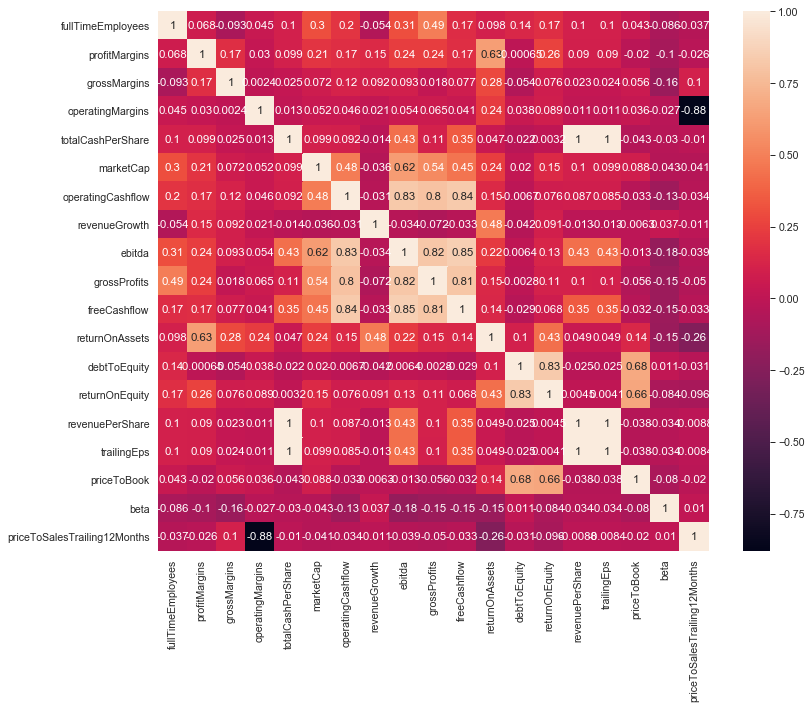

In [296]:
corr = data_SS[var].corr()
plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.2)
sns.heatmap(corr, annot=True)
plt.tight_layout()

In [297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif1 = pd.Series([vif(data_SS.values, i) for i in range(data_SS.shape[1])],index=data_SS.columns)
vif1.sort_values(ascending=False)

trailingEps                     36635.354151
revenuePerShare                 35764.406472
totalCashPerShare                 377.737496
ebitda                             13.940781
grossProfits                       11.337989
freeCashflow                        8.395671
operatingCashflow                   7.563212
returnOnEquity                      6.089427
debtToEquity                        5.244990
priceToSalesTrailing12Months        5.066463
operatingMargins                    4.704097
returnOnAssets                      3.781068
fullTimeEmployees                   2.417608
priceToBook                         2.198484
profitMargins                       2.171824
marketCap                           2.065071
revenueGrowth                       1.530869
grossMargins                        1.299938
beta                                1.130661
dtype: float64

In [298]:
var.remove('trailingEps')
var.remove('revenuePerShare')

data_SS2 = data_SS[var]

vif2 = pd.Series([vif(data_SS2.values, i) for i in range(data_SS2.shape[1])],
                index=data_SS2.columns)
vif2.sort_values(ascending=False)

ebitda                          10.808267
grossProfits                     8.880666
freeCashflow                     7.359631
operatingCashflow                6.206009
returnOnEquity                   5.989753
priceToSalesTrailing12Months     5.052433
debtToEquity                     4.984759
operatingMargins                 4.687474
returnOnAssets                   3.774646
totalCashPerShare                2.806693
priceToBook                      2.170922
profitMargins                    2.115401
fullTimeEmployees                2.076337
marketCap                        1.993330
revenueGrowth                    1.527550
grossMargins                     1.266063
beta                             1.130156
dtype: float64

In [299]:
var.remove('ebitda')

data_SS3 = data_SS2[var]

vif3 = pd.Series([vif(data_SS3.values, i) for i in range(data_SS3.shape[1])],
                index=data_SS3.columns)
vif3.sort_values(ascending=False)

freeCashflow                    7.358030
grossProfits                    7.326388
returnOnEquity                  5.986278
priceToSalesTrailing12Months    5.041887
debtToEquity                    4.984245
operatingMargins                4.687061
operatingCashflow               4.535259
returnOnAssets                  3.701915
priceToBook                     2.169877
profitMargins                   2.093305
fullTimeEmployees               2.023273
totalCashPerShare               1.602609
marketCap                       1.580289
revenueGrowth                   1.524790
grossMargins                    1.263985
beta                            1.105449
dtype: float64

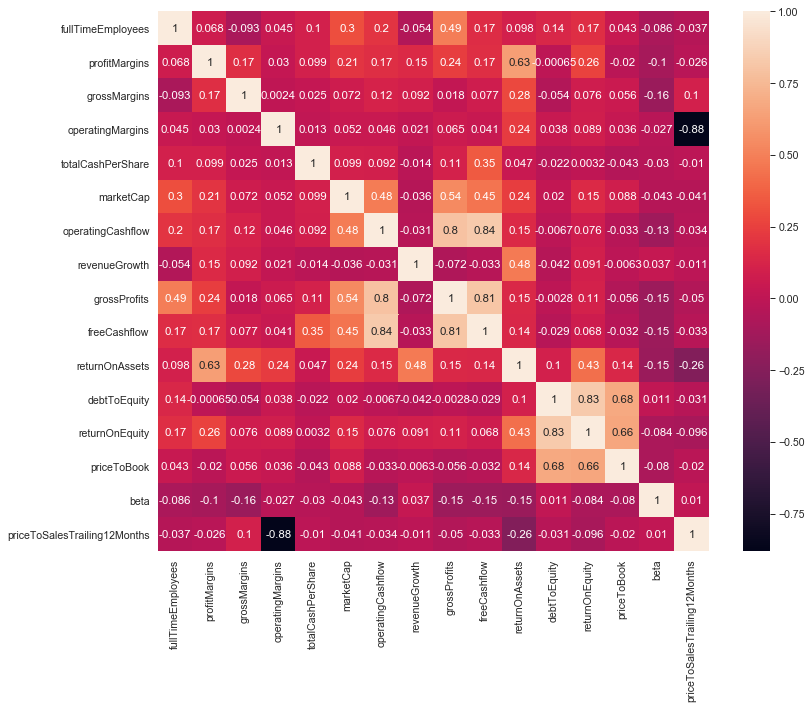

In [300]:
corr = data_SS3[var].corr()
plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.2)
sns.heatmap(corr, annot=True)
plt.tight_layout()

In [301]:
var.remove('priceToSalesTrailing12Months')
var.remove('debtToEquity')
var.remove('freeCashflow')

data_SS4 = data_SS3[var]

vif4 = pd.Series([vif(data_SS4.values, i) for i in range(data_SS4.shape[1])],
                index=data_SS4.columns)
vif4.sort_values(ascending=False)

grossProfits         4.559251
operatingCashflow    3.363976
returnOnAssets       3.221106
returnOnEquity       2.411625
priceToBook          2.032871
profitMargins        1.983312
fullTimeEmployees    1.608255
marketCap            1.554507
revenueGrowth        1.491238
grossMargins         1.153952
operatingMargins     1.125559
beta                 1.091301
totalCashPerShare    1.027767
dtype: float64

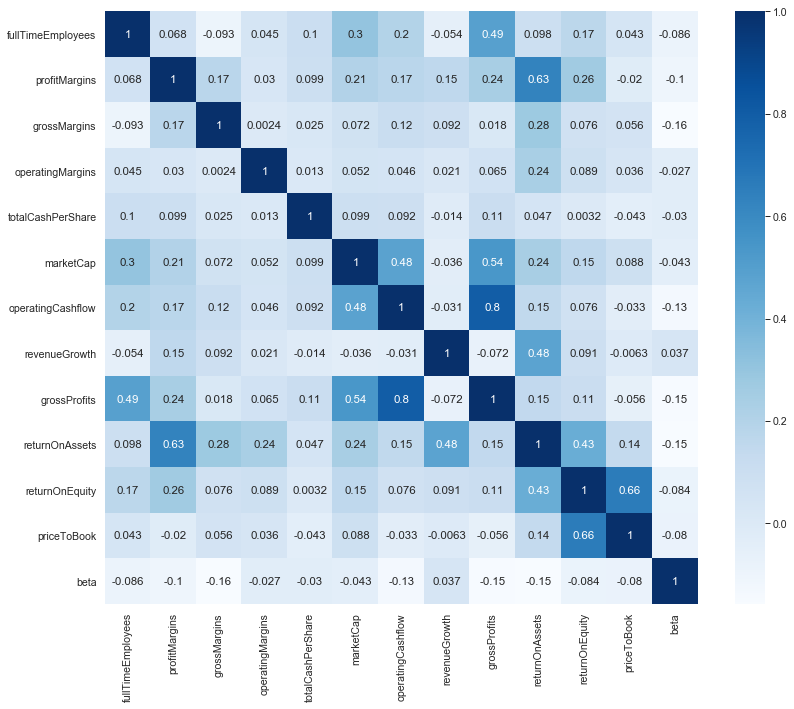

In [303]:
corr = data_SS4[var].corr()
plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.2)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()

In [306]:
from sklearn.decomposition import PCA

explained = list()
feature_importance = list()

for n in range(10):
    
    PCAmod = PCA(n_components=n+1)
    PCAmod.fit(data_SS4)
    
    explained.append(pd.Series({'n': n+1,
                                'Var': PCAmod.explained_variance_ratio_.sum()}))
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
    contributions = np.abs(PCAmod.components_)*weights
    overall_cont = contributions.sum(axis=0)
    feature_importance.append(pd.DataFrame({'n': n+1,
                                            'features': var,
                                            'values': overall_cont/overall_cont.sum()}))   

In [508]:
print(PCAmod.components_.shape)
print(PCAmod.explained_variance_ratio_.shape)

(10, 13)
(10,)


,Var
n,
1.0,0.227654
2.0,0.380608
3.0,0.493287
4.0,0.578116
5.0,0.654298
6.0,0.730027
7.0,0.797695
8.0,0.857370
9.0,0.911338


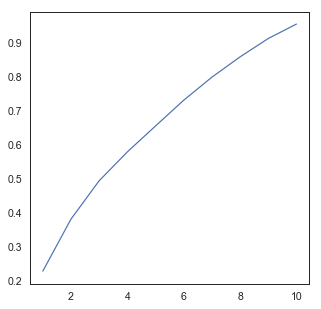

In [307]:
pca_df = pd.concat(explained, axis=1).T.set_index('n')
plt.plot(pca_df.index, pca_df.Var)
pca_df

In [308]:
features_df = pd.concat(feature_importance).pivot(index='n',columns='features',values='values')
features_df

features,beta,fullTimeEmployees,grossMargins,grossProfits,marketCap,operatingCashflow,operatingMargins,priceToBook,profitMargins,returnOnAssets,returnOnEquity,revenueGrowth,totalCashPerShare
n,,,,,,,,,,,,,
1,0.048973,0.084467,0.044995,0.134585,0.118877,0.121590,0.034031,0.041629,0.102888,0.116226,0.089146,0.030405,0.032189
2,0.032947,0.079351,0.051327,0.128360,0.097621,0.114094,0.031973,0.064872,0.089196,0.120124,0.098988,0.060920,0.030227
3,0.027075,0.079290,0.058616,0.103407,0.082491,0.096124,0.026371,0.097851,0.093719,0.115212,0.113640,0.074554,0.031650
4,0.053330,0.081449,0.079299,0.091502,0.075433,0.089602,0.037430,0.090334,0.083655,0.106990,0.101584,0.080155,0.029238
5,0.062884,0.075646,0.073004,0.084838,0.074053,0.083953,0.070036,0.086222,0.082709,0.100127,0.097278,0.080948,0.028301
6,0.062225,0.075277,0.069899,0.082794,0.072310,0.085479,0.066185,0.080043,0.080680,0.093177,0.091672,0.079905,0.060354
7,0.074322,0.082530,0.075631,0.076357,0.072981,0.084240,0.067819,0.077374,0.076217,0.087284,0.084544,0.078956,0.061745
8,0.072101,0.080803,0.076421,0.072949,0.068826,0.082658,0.064056,0.076259,0.087895,0.083890,0.081019,0.090215,0.062908
9,0.073893,0.090457,0.084370,0.070919,0.065883,0.085737,0.061078,0.074697,0.083766,0.079984,0.077869,0.088891,0.062456


In [309]:
def sort_row(row, num):
    row_sorted = row.sort_values(ascending=False)
    return row_sorted.index.values[: num]

ind = ['st', 'nd', 'rd']
columns = ['n_PC','Explained']
for i in range(5):
    try:
        columns.append(f'{i+1}{ind[i]} most important')
    except:
        columns.append(f'{i+1}th most important')

feature_sorted = pd.DataFrame(columns = columns)
feature_sorted['n_PC'] = features_df.index.values
feature_sorted.set_index('n_PC', inplace=True)
feature_sorted['Explained'] = pca_df.Var

for i in range(features_df.shape[0]):
    feature_sorted.iloc[i, 1:] = sort_row(features_df.iloc[i,:], 5)

feature_sorted    

,Explained,1st most important,2nd most important,3rd most important,4th most important,5th most important
n_PC,,,,,,
1,0.227654,grossProfits,operatingCashflow,marketCap,returnOnAssets,profitMargins
2,0.380608,grossProfits,returnOnAssets,operatingCashflow,returnOnEquity,marketCap
3,0.493287,returnOnAssets,returnOnEquity,grossProfits,priceToBook,operatingCashflow
4,0.578116,returnOnAssets,returnOnEquity,grossProfits,priceToBook,operatingCashflow
5,0.654298,returnOnAssets,returnOnEquity,priceToBook,grossProfits,operatingCashflow
6,0.730027,returnOnAssets,returnOnEquity,operatingCashflow,grossProfits,profitMargins
7,0.797695,returnOnAssets,returnOnEquity,operatingCashflow,fullTimeEmployees,revenueGrowth
8,0.857370,revenueGrowth,profitMargins,returnOnAssets,operatingCashflow,returnOnEquity
9,0.911338,fullTimeEmployees,revenueGrowth,operatingCashflow,grossMargins,profitMargins


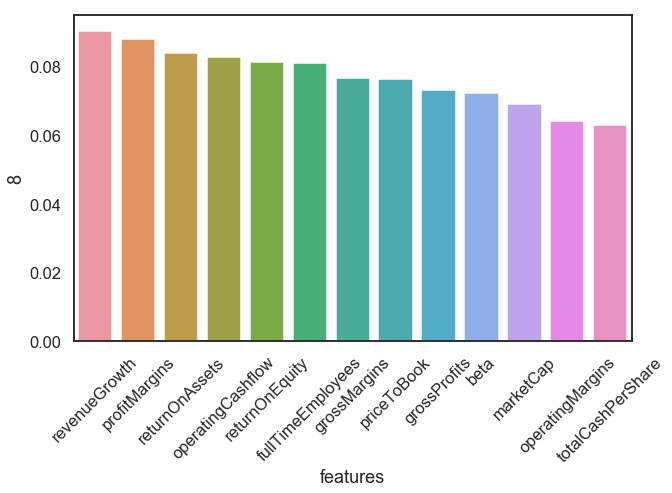

In [310]:
#8 Principal components
plt.figure(figsize=(10,6))
sns.set_context('talk')
sns.barplot(features_df.iloc[7,:].sort_values(ascending=False).index, 
        features_df.iloc[7,:].sort_values(ascending=False))
plt.xticks(rotation=45)
plt.show()

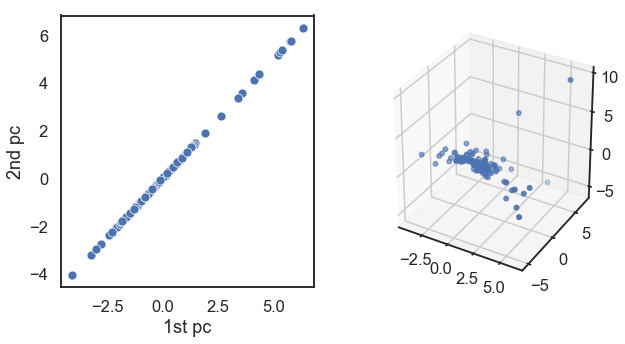

In [316]:
from mpl_toolkits.mplot3d import Axes3D

PCA2 = PCA(n_components=2)
X_pca2 = PCA2.fit_transform(data_SS4)

PCA3 = PCA(n_components=3)
X_pca3 = PCA3.fit_transform(data_SS4)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
sns.scatterplot(X_pca2[:,0], X_pca2[:,0], ax=ax1)
ax1.set_xlabel('1st pc')
ax1.set_ylabel('2nd pc')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2])
plt.show()

In [349]:
sns.set_context('paper', font_scale=2)

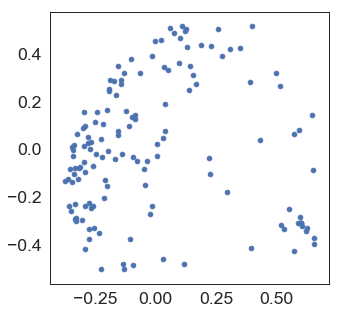

In [351]:
from sklearn.decomposition import KernelPCA

KPCA = KernelPCA(n_components=2, kernel='rbf',random_state=42)

X_kpca2 = KPCA.fit_transform(data_SS4)

plt.scatter(X_kpca2[:,0], X_kpca2[:,1])
plt.show()

In [494]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as score

class plot:
    
    def __init__(self,k_l, X_data):
        
        self.k_l = k_l
        self.X_data = X_data

    def plot_k_clusters(self):
        
        k_l = self.k_l
        X_data = self.X_data
        
        kmods = []
        dfs = []
        scores = []

        plot_X = pd.DataFrame(X_data, columns=['Com1','Com2'])

        fig, axes = plt.subplots(2,2, figsize=(10,8))

        for k in k_l:
            km = KMeans(n_clusters=k, random_state=42).fit(X_data)

            plot_X['labels'] = km.labels_          
            ax = axes.flatten()[k-2]
            sns.scatterplot(x='Com1', y='Com2', data=plot_X, hue = 'labels', ax = ax, legend=False)
            ax.legend('off')
            si = round(score(plot_X.iloc[:,:2], plot_X.iloc[:,2]),3)
            ax.set_title(f'n_clusters = {k}, score = {si}')

            df = pd.concat([data[var], plot_X], axis=1)
            dfs.append(df)
            #scores.append(score(plot_X.iloc[:,:2], plot_X.iloc[:,2]))

        plt.tight_layout()
        plt.show()

    def return_dfs(self):
        return dfs

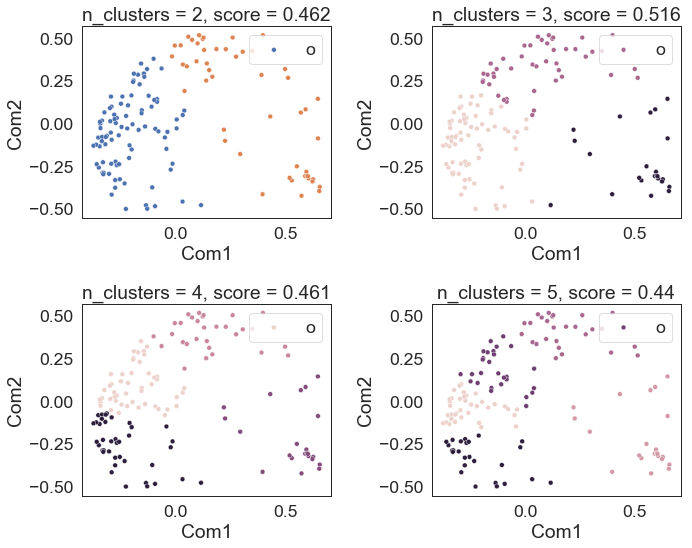

In [495]:
K = [2,3,4,5] 
KernelPCA = plot(K, X_kpca2)
KernelPCA.plot_k_clusters()

In [444]:
KernelPCA_dfs = KernelPCA.return_dfs()
for df in KernelPCA_dfs:
    groups = df.groupby(['labels']).median().iloc[:,:4]
    print(groups)
    print()

        fullTimeEmployees  profitMargins  grossMargins  operatingMargins
labels                                                                  
0                   28632       0.180335      0.506685          0.196695
1                    7721      -0.132290      0.337180         -0.174560

        fullTimeEmployees  profitMargins  grossMargins  operatingMargins
labels                                                                  
0                   33700        0.19737      0.525795          0.211945
1                    7986       -0.13229      0.233130         -0.122560
2                   23100        0.09097      0.477615          0.111455

        fullTimeEmployees  profitMargins  grossMargins  operatingMargins
labels                                                                  
0                 33400.0        0.07768      0.315610          0.107890
1                  5590.5       -0.21298      0.237505         -0.272055
2                 12000.0        0.07403      0.4

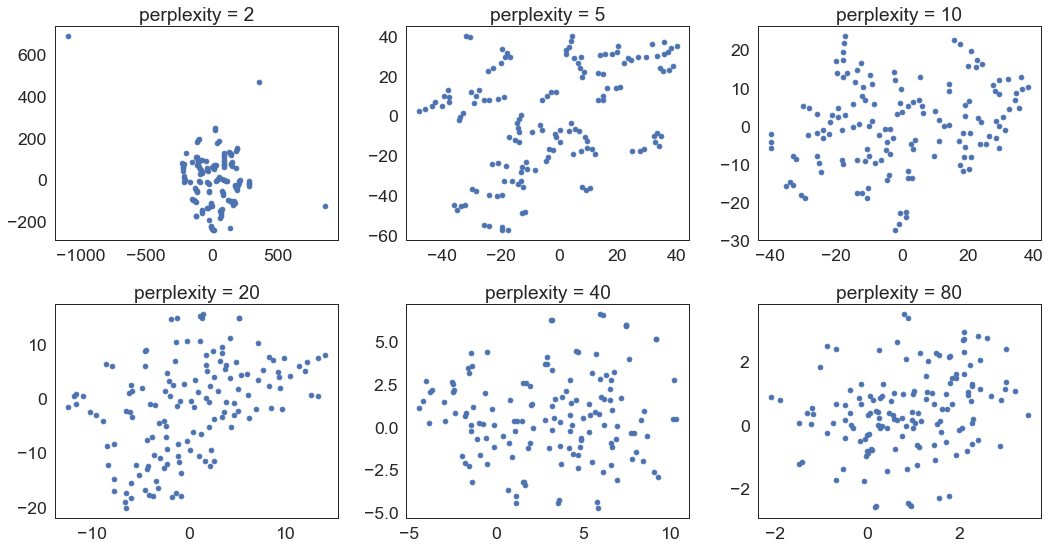

In [445]:
from sklearn.manifold import TSNE

perplexity = [2, 5, 10, 20, 40, 80]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i,num in enumerate(perplexity):
    
    tsne = TSNE(n_components=2, perplexity = num)
    X_tsne = tsne.fit_transform(data_SS4)
    axes.flatten()[i].scatter(X_tsne[:,0], X_tsne[:,1])
    axes.flatten()[i].set_title(f'perplexity = {num}')

plt.tight_layout()
plt.show()

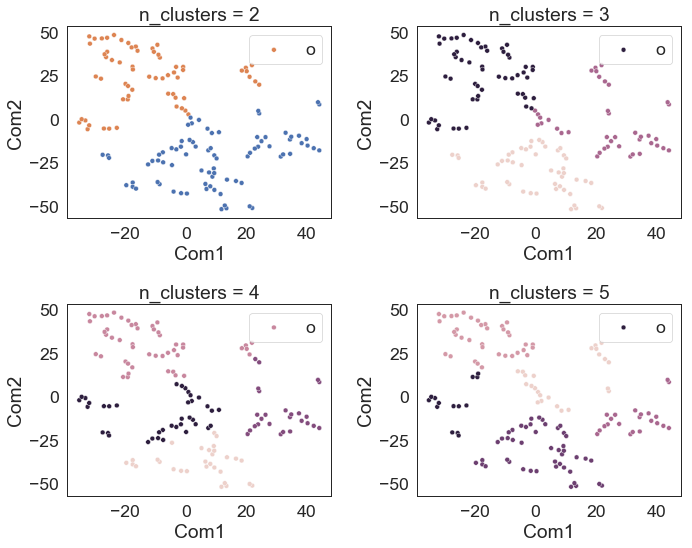

In [446]:
tsne5 = TSNE(n_components=2, perplexity = 5)
X_tsne5 = tsne5.fit_transform(data_SS4)

TSNE = plot(K, X_tsne5)
TSNE.plot_k_clusters()

In [447]:
TSNE_dfs = TSNE.return_dfs()
for df in TSNE_dfs:
    groups = df.groupby(['labels']).median().iloc[:,:4]
    print(groups)
    print()

        fullTimeEmployees  profitMargins  grossMargins  operatingMargins
labels                                                                  
0                   28632       0.180335      0.506685          0.196695
1                    7721      -0.132290      0.337180         -0.174560

        fullTimeEmployees  profitMargins  grossMargins  operatingMargins
labels                                                                  
0                   33700        0.19737      0.525795          0.211945
1                    7986       -0.13229      0.233130         -0.122560
2                   23100        0.09097      0.477615          0.111455

        fullTimeEmployees  profitMargins  grossMargins  operatingMargins
labels                                                                  
0                 33400.0        0.07768      0.315610          0.107890
1                  5590.5       -0.21298      0.237505         -0.272055
2                 12000.0        0.07403      0.4

In [449]:
##can use factor analysis to uncover any latent pattern or factors

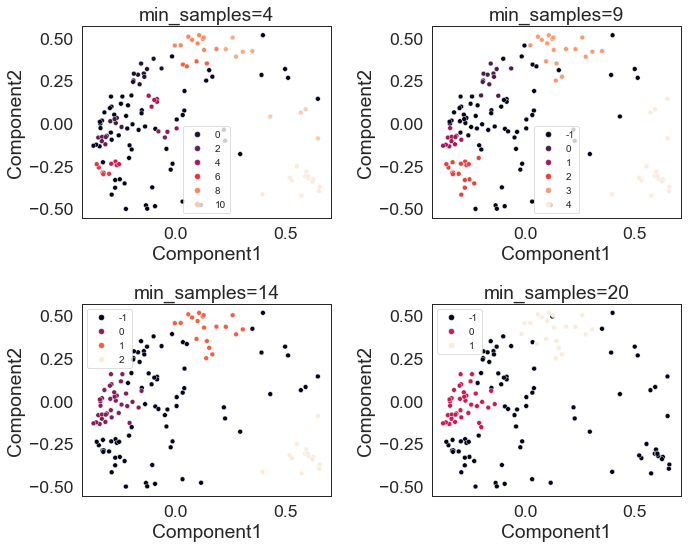

In [480]:
from sklearn.cluster import OPTICS

fig, axes = plt.subplots(2,2, figsize=(10,8))

opt_dfs = []

for i,n in enumerate([4,9,14,20]):
    
    opt = OPTICS(min_samples=n).fit(X_kpca2)
    plot_X = pd.DataFrame(X_kpca2, columns=['Component1', 'Component2'])
    plot_X['labels'] = opt.labels_
    
    df = pd.concat([data[var], plot_X], axis=1)
    opt_dfs.append(df)
    
    ax = axes.flatten()[i]
    sns.scatterplot(x='Component1', y='Component2', data=plot_X, hue='labels', palette='rocket', ax=ax)
    ax.set_title(f'min_samples={n}')
    ax.legend(loc='right bottom', prop={'size':10})

plt.tight_layout()

In [485]:
opt_dfs[1].groupby(['labels']).median()

,fullTimeEmployees,profitMargins,grossMargins,operatingMargins,totalCashPerShare,marketCap,operatingCashflow,revenueGrowth,grossProfits,returnOnAssets,returnOnEquity,priceToBook,beta,Component1,Component2
labels,,,,,,,,,,,,,,,
-1,33700.0,0.100175,0.356005,0.124495,13.0725,6.963491e+10,2.264000e+09,0.3415,6.752500e+09,0.025735,0.138505,5.219568,1.184612,-0.102619,0.018701
0,7992.5,-0.003265,0.273630,-0.003485,14.7520,6.304843e+10,3.915250e+08,0.9630,4.118742e+09,0.034500,0.144325,5.219568,1.247178,-0.159761,0.278086
1,25000.0,0.188950,0.564680,0.235010,9.5100,1.259338e+11,4.227000e+09,0.2270,9.719737e+09,0.068960,0.315140,5.785160,0.953056,-0.335244,-0.096919
2,38000.0,0.240010,0.606150,0.314810,7.8620,1.998810e+11,9.099201e+09,0.2710,1.958100e+10,0.091400,0.268060,5.219568,0.704694,-0.290449,-0.289856
3,6620.0,-0.231745,0.204555,-0.272055,18.1235,2.525519e+10,-1.240200e+07,0.9340,6.089205e+08,-0.063945,-0.229280,5.219568,1.384317,0.135268,0.434180
4,12000.0,0.107910,0.500760,0.125020,10.0370,8.054483e+10,3.182000e+09,0.2720,1.829379e+09,0.067650,0.243840,5.219568,1.159259,0.598951,-0.309719


In [502]:
from sklearn.metrics import silhouette_score as score

optics = opt_dfs[2]
score(optics[['Component1','Component2']], optics.labels)

0.20869206242266114